In [1]:
%matplotlib inline

In [2]:
# This will be regarding automatic feature selection. This is
# the feature equivalent of parameter tuning. In the same way that
# we use cross-validate to find parameter, we can find the best
# subset of features.
# The simplest idea is univariate selection. The other methods
# involve working with a combination of features.
# An added benefit to feature selection is that it can ease the
# burden on the data collection.

In [3]:
# With univariate selection, scoring functions will come to the
# forefront again. This time, they will define the comparable
# measure by which we can eliminate features.

In [4]:
from sklearn import datasets
X, y = datasets.make_regression(1000, 10000)

In [5]:
# We can now compare the features that are included with the
# various methods. (This is good for text analysis)

In [6]:
from sklearn import feature_selection

In [7]:
f, p = feature_selection.f_regression(X, y)

In [8]:
# Here, f is the f-score associated with each linear model fit
# with just one of the features. We can then compare these
# features and based on this comparison, we can cull features.
# p is also the p-value associated with that f-score.

In [9]:
# In statistics, the p-value is the probability of a value more
# extreme than the current value of the test statistic.
# Here, the f-score is the test statistic.
f[:5]

array([ 2.15568056,  0.0344714 ,  0.19768934,  0.25618762,  0.02081596])

In [10]:
p[:5]

array([ 0.14235859,  0.85274539,  0.65668885,  0.61286328,  0.88531057])

In [11]:
# many of the p-values are quite large. We would rather have that
# the p-values be small. We can use numpy to choose all the
# p-values less than .05. These will be the features we will use
# for analysis.

In [12]:
import numpy as np

In [13]:
idx = np.arange(0, X.shape[1])
features_to_keep = idx[p < .05]
len(features_to_keep)

499

In [14]:
# Another option is using the VarianceThreshold object. A nice
# feature of this is that because it does not use the outcome
# variable, it can be used for unsupervised cases.

In [16]:
# Set the threshold for which we eliminate features. Just take the
# median of the feature variances and supply that:
var_threshold = feature_selection.VarianceThreshold(np.median(np.var(X, axis=1)))

In [17]:
var_threshold.fit_transform(X).shape

(1000, 4905)

In [18]:
# this elimiated almost half the features.

In [19]:
# How it works...
# All these methods work by fitting a basic model with a single
# feature. Depending on whether we have a classification problem
# or a regression problem, we can use the appropriate scoring
# function.

In [20]:
# Smaller problem:
X, y = datasets.make_regression(10000, 20)

In [21]:
f, p = feature_selection.f_regression(X, y)

In [22]:
import matplotlib.pyplot as plt

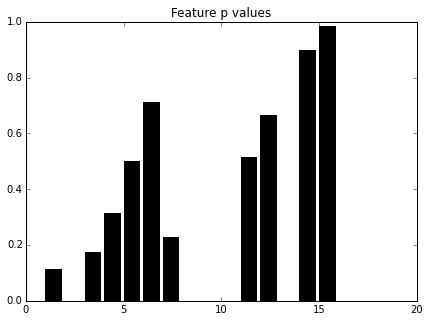

In [23]:
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(np.arange(20), p, color='k')
ax.set_title('Feature p values')